## Leer y Escribir archivos con Python

Podemos leer y escribir archivos usando la función `open()`

```
open(<ruta>, mode=<modo>, enconding="utf8")
```

existen distintos modos para cargar nuestro archivo, pero los más usados son estos tres:

* "r" : Solo lectura (read-only)
* "w" : Solo escritura (write-only). Cuidado que sobreescribe todo el archivo!
* "a" : Agregar (append)

el `encoding` "utf8" o "utf-8" es el formato de codificación que nos permite interpretar correctamente texto en español (el precio a pagar por usar la letra ñ) https://es.wikipedia.org/wiki/UTF-8.

In [1]:
archivo = open("texto.txt", mode="w", encoding="utf8")
archivo.write("Estoy escribiendo una línea!")
archivo.close()

In [2]:
# Para no tener que abrirlo y cerrarlo podemos usar with:
with open("texto.txt", mode="w", encoding="utf8") as archivo:
    archivo.write("Estoy escribiendo una línea!\n")
    archivo.write("Estoy escribiendo otra línea!\n")

# fuera del bloque with el archivo se cerró, ya no podemos escribir
#archivo.write("Hola")

In [3]:
# Para no tener que abrirlo y cerrarlo podemos usar with:
with open("texto.txt", mode="r", encoding="utf8") as archivo:
    print(archivo.readline())

# fuera del bloque with el archivo se cerró, ya no podemos escribir
#archivo.readline()

Estoy escribiendo una línea!



### Ejemplo

Vamos a guardar datos y a volverlos a cargar.

Empecemos por generar datos de ejemplo

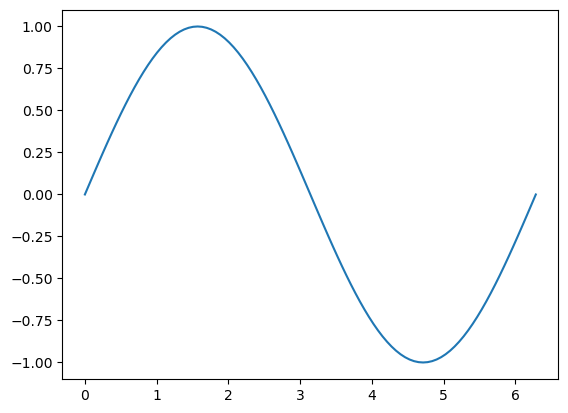

In [4]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2*np.pi, 101)
y = np.sin(x)

plt.plot(x, y)

In [5]:
# Ahora los guardo en formato .csv
filepath = "./mis_datos.csv"
with open(filepath, "w", encoding="utf-8") as f:
    # Header / Encabezado:
    f.write("x,y\n")
    # Conlumnas
    for x_i, y_i in zip(x, y):
        f.write(f"{x_i},{y_i}\n")

In [6]:
# Veamos el archivo
with open(filepath, "r", encoding="utf-8") as f:
    print(f.read())

x,y
0.0,0.0
0.06283185307179587,0.06279051952931337
0.12566370614359174,0.12533323356430426
0.1884955592153876,0.18738131458572463
0.25132741228718347,0.2486898871648548
0.3141592653589793,0.3090169943749474
0.3769911184307752,0.368124552684678
0.4398229715025711,0.4257792915650727
0.5026548245743669,0.4817536741017153
0.5654866776461628,0.5358267949789967
0.6283185307179586,0.5877852522924731
0.6911503837897546,0.6374239897486897
0.7539822368615504,0.6845471059286887
0.8168140899333463,0.7289686274214116
0.8796459430051422,0.7705132427757893
0.942477796076938,0.8090169943749475
1.0053096491487339,0.8443279255020151
1.0681415022205298,0.8763066800438637
1.1309733552923256,0.9048270524660196
1.1938052083641215,0.9297764858882515
1.2566370614359172,0.9510565162951535
1.3194689145077132,0.9685831611286311
1.3823007675795091,0.9822872507286887
1.4451326206513049,0.9921147013144779
1.5079644737231008,0.9980267284282716
1.5707963267948968,1.0
1.6336281798666925,0.9980267284282716
1.696460032

## Pandas

Pandas es la librería que más nos facilita trabajar con datos. Veamos como podemos cargar los datos que acabamos de guardar usando la función `read_csv()`

In [7]:
import pandas as pd

datos = pd.read_csv("mis_datos.csv")
datos

,x,y
0,0.000000,0.000000e+00
1,0.062832,6.279052e-02
2,0.125664,1.253332e-01
3,0.188496,1.873813e-01
4,0.251327,2.486899e-01
...,...,...
96,6.031858,-2.486899e-01
97,6.094690,-1.873813e-01
98,6.157522,-1.253332e-01
99,6.220353,-6.279052e-02


In [8]:
type(datos)

pandas.core.frame.DataFrame

El principal objeto que introduce Pandas es el `DataFrame`. Un DataFrame es un conjunto de datos organizado en filas y columnas.

Una forma simple de crear un DataFrame es a partir de un diccionario:

In [9]:
pd.DataFrame({"col 1" : [1.1, 1.2], "col 2" : [1.3, 4]})

,col 1,col 2
0,1.1,1.3
1,1.2,4.0


Cada DataFrame tendrá también un índice o `index`. Este índice será único para cada fila, y si no lo proporcionamos se creará automaticamente

In [10]:
df = pd.DataFrame({"x" : [1.1, 1.2, 2.2], "y" : [1.3, 4, 3.3]}, 
             index=[4012, 4219, 4244]
             )
# puedo darle nombre a un índice
df.index.name = "cod"
df

,x,y
cod,,
4012,1.1,1.3
4219,1.2,4.0
4244,2.2,3.3


Cada columna de un DataFrame es otro tipo de dato llamado `Series`, que mantiene el índice y los datos de la columna en cuestión.

In [11]:
df["x"]

cod
4012    1.1
4219    1.2
4244    2.2
Name: x, dtype: float64

In [12]:
df.x

cod
4012    1.1
4219    1.2
4244    2.2
Name: x, dtype: float64

In [13]:
type(df.x)

pandas.core.series.Series

### Cargando un Excel

In [14]:
# Empecemos cargando un dataset más complejo desde excel
filepath = "datos/Employee Sample Data.xlsx"
df = pd.read_excel(filepath, index_col=0)

In [15]:
# vamos a explorar los datos
df.head() # nos muestra las primeras 5 filas de datos

,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
EEID,,,,,,,,,,,,,
E02387,Emily Davis,Sr. Manger,IT,Research & Development,Female,Black,55,2016-04-08,141604,0.15,United States,Seattle,2021-10-16
E04105,Theodore Dinh,Technical Architect,IT,Manufacturing,Male,Asian,59,1997-11-29,99975,0.00,China,Chongqing,NaT
E02572,Luna Sanders,Director,Finance,Speciality Products,Female,Caucasian,50,2006-10-26,163099,0.20,United States,Chicago,NaT
E02832,Penelope Jordan,Computer Systems Manager,IT,Manufacturing,Female,Caucasian,26,2019-09-27,84913,0.07,United States,Chicago,NaT
E01639,Austin Vo,Sr. Analyst,Finance,Manufacturing,Male,Asian,55,1995-11-20,95409,0.00,United States,Phoenix,NaT


In [16]:
df.describe()

,Age,Hire Date,Annual Salary,Bonus %,Exit Date
count,1000.000000,1000,1000.000000,1000.000000,85
mean,44.382000,2012-04-07 02:54:14.400000,113217.365000,0.088660,2016-11-02 18:04:14.117647104
min,25.000000,1992-01-09 00:00:00,40063.000000,0.000000,1994-12-18 00:00:00
25%,35.000000,2007-02-14 00:00:00,71430.250000,0.000000,2014-12-25 00:00:00
50%,45.000000,2014-02-15 12:00:00,96557.000000,0.000000,2019-05-23 00:00:00
75%,54.000000,2018-06-22 00:00:00,150782.250000,0.150000,2021-04-09 00:00:00
max,65.000000,2021-12-26 00:00:00,258498.000000,0.400000,2022-08-17 00:00:00
std,11.246981,NaN,53545.985644,0.117856,NaN


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, E02387 to E03545
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Full Name      1000 non-null   object        
 1   Job Title      1000 non-null   object        
 2   Department     1000 non-null   object        
 3   Business Unit  1000 non-null   object        
 4   Gender         1000 non-null   object        
 5   Ethnicity      1000 non-null   object        
 6   Age            1000 non-null   int64         
 7   Hire Date      1000 non-null   datetime64[ns]
 8   Annual Salary  1000 non-null   int64         
 9   Bonus %        1000 non-null   float64       
 10  Country        1000 non-null   object        
 11  City           1000 non-null   object        
 12  Exit Date      85 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2), object(8)
memory usage: 109.4+ KB


In [18]:
df.Country.unique()

array(['United States', 'China', 'Brazil'], dtype=object)

### Selección e Indexado

In [19]:
df.head()

,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
EEID,,,,,,,,,,,,,
E02387,Emily Davis,Sr. Manger,IT,Research & Development,Female,Black,55,2016-04-08,141604,0.15,United States,Seattle,2021-10-16
E04105,Theodore Dinh,Technical Architect,IT,Manufacturing,Male,Asian,59,1997-11-29,99975,0.00,China,Chongqing,NaT
E02572,Luna Sanders,Director,Finance,Speciality Products,Female,Caucasian,50,2006-10-26,163099,0.20,United States,Chicago,NaT
E02832,Penelope Jordan,Computer Systems Manager,IT,Manufacturing,Female,Caucasian,26,2019-09-27,84913,0.07,United States,Chicago,NaT
E01639,Austin Vo,Sr. Analyst,Finance,Manufacturing,Male,Asian,55,1995-11-20,95409,0.00,United States,Phoenix,NaT


In [20]:
df["Country"]["E04105"] # Primero columna, luego fila (índice)

'China'

In [21]:
df.loc["E04105", "Country"] # Primero Fila (índice), luego columna

'China'

In [22]:
df.iloc[1, 10]  # Indices de la fila y la columna

'China'

In [23]:
df.iloc[10:15, :]   # Todas las columnas, filas 10 a 14

,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
EEID,,,,,,,,,,,,,
E00591,Savannah Ali,Sr. Manger,Human Resources,Manufacturing,Female,Asian,36,2009-02-11,157333,0.15,United States,Miami,NaT
E03344,Camila Rogers,Controls Engineer,Engineering,Speciality Products,Female,Caucasian,27,2021-10-21,109851,0.00,United States,Seattle,NaT
E00530,Eli Jones,Manager,Human Resources,Manufacturing,Male,Caucasian,59,1999-03-14,105086,0.09,United States,Austin,NaT
E04239,Everleigh Ng,Sr. Manger,Finance,Research & Development,Female,Asian,51,2021-06-10,146742,0.10,China,Shanghai,NaT
E03496,Robert Yang,Sr. Analyst,Accounting,Speciality Products,Male,Asian,31,2017-11-04,97078,0.00,United States,Austin,2020-03-09


In [24]:
df.loc[:, ["Country", "Age"]] # Todas las filas, columnas "Country" y "Age"

,Country,Age
EEID,,
E02387,United States,55
E04105,China,59
E02572,United States,50
E02832,United States,26
E01639,United States,55
...,...,...
E03094,United States,33
E01909,China,44
E04398,United States,31


#### Filtrando

In [25]:
df[df["Age"] < 26]

,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
EEID,,,,,,,,,,,,,
E04332,Luke Martin,Analyst,Finance,Manufacturing,Male,Black,25,2020-05-16,41336,0.00,United States,Miami,2021-05-20
E02862,Peyton Huang,Sr. Manger,IT,Manufacturing,Female,Asian,25,2021-07-02,125633,0.11,China,Beijing,NaT
E04288,Ella White,Development Engineer,Engineering,Manufacturing,Female,Caucasian,25,2020-01-20,71359,0.00,United States,Phoenix,NaT
E04359,Greyson Lam,Vice President,Accounting,Manufacturing,Male,Asian,25,2021-02-08,198243,0.31,United States,Miami,NaT
E01896,Adam Nelson,Director,Finance,Speciality Products,Male,Caucasian,25,2020-01-14,168014,0.27,United States,Chicago,2021-07-27
E01466,Connor Vang,Analyst,Sales,Speciality Products,Male,Asian,25,2021-07-28,46845,0.00,United States,Miami,NaT
E04290,Hannah Gomez,Technical Architect,IT,Manufacturing,Female,Latino,25,2021-05-11,83934,0.00,United States,Miami,NaT
E04165,Sophie Vang,Sr. Manger,Marketing,Manufacturing,Female,Asian,25,2021-09-14,136810,0.14,China,Chongqing,NaT
E03971,Lillian Chen,Sr. Manger,Marketing,Research & Development,Female,Asian,25,2020-04-09,157057,0.10,United States,Columbus,NaT


Para multiples condiciones tengo que usar paréntesis 

```
& : and
| : or
```

In [26]:
df[(df["Age"] < 26) & (df["Department"] == "Engineering")]

,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
EEID,,,,,,,,,,,,,
E04288,Ella White,Development Engineer,Engineering,Manufacturing,Female,Caucasian,25,2020-01-20,71359,0.0,United States,Phoenix,NaT
E01242,Emery Doan,Controls Engineer,Engineering,Corporate,Female,Asian,25,2021-06-23,86464,0.0,China,Shanghai,NaT
E02696,Ryan Lu,Development Engineer,Engineering,Speciality Products,Male,Asian,25,2021-07-08,67275,0.0,United States,Columbus,NaT


In [27]:
df[(df["Age"] < 26) | (df["Age"] > 60)]

,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
EEID,,,,,,,,,,,,,
E04332,Luke Martin,Analyst,Finance,Manufacturing,Male,Black,25,2020-05-16,41336,0.00,United States,Miami,2021-05-20
E00163,Bella Powell,Director,Finance,Research & Development,Female,Black,65,2002-03-04,175837,0.20,United States,Phoenix,NaT
E00884,Camila Silva,Sr. Manger,Marketing,Speciality Products,Female,Latino,64,2003-12-01,154828,0.13,United States,Seattle,NaT
E04116,David Barnes,Director,IT,Corporate,Male,Caucasian,64,2013-11-03,186503,0.24,United States,Columbus,NaT
E03343,Carson Lu,Engineering Manager,Engineering,Speciality Products,Male,Asian,64,1996-12-04,99354,0.12,China,Beijing,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
E03718,Zoe Zhou,Manager,Finance,Corporate,Female,Asian,61,2009-10-06,103096,0.07,China,Beijing,NaT
E00481,Jameson Nelson,Network Architect,IT,Research & Development,Male,Caucasian,61,2016-03-08,96566,0.00,United States,Columbus,NaT
E00785,Hannah Hoang,Manager,Accounting,Speciality Products,Female,Asian,25,2021-12-15,114893,0.06,China,Chengdu,NaT


### Graficando un DataFrame

In [28]:
import matplotlib.pyplot as plt

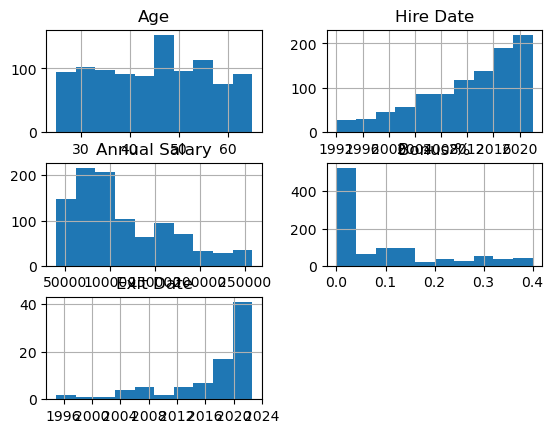

In [29]:
axs = df.hist()
#plt.tight_layout()

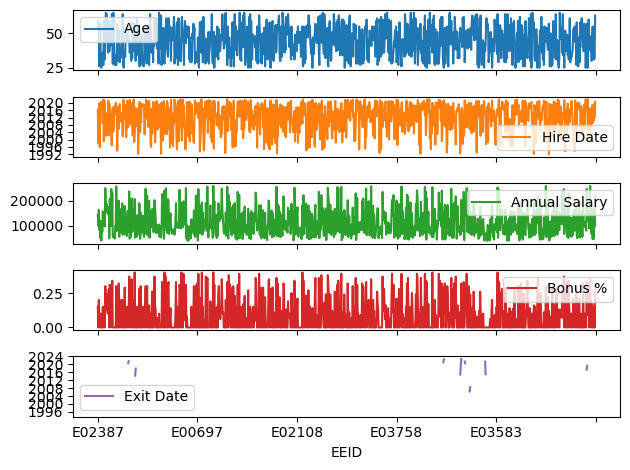

In [30]:
df.plot(subplots=True)
plt.tight_layout()

<Axes: xlabel='Age', ylabel='Annual Salary'>

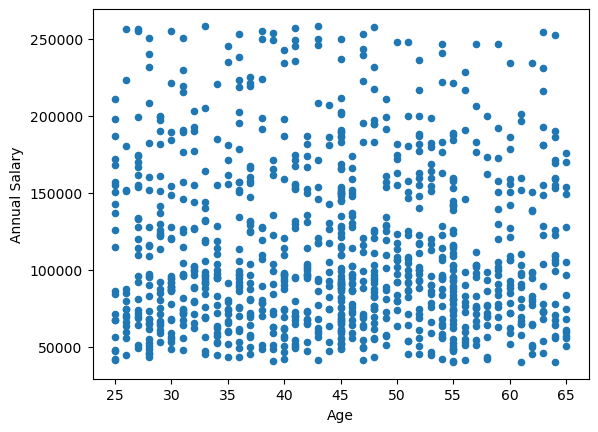

In [31]:
df.plot(x="Age", y="Annual Salary", kind="scatter")

<Axes: xlabel='Hire Date', ylabel='Annual Salary'>

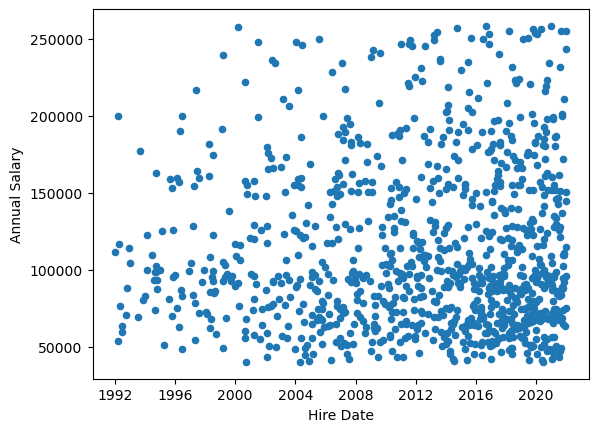

In [32]:
df.plot(x="Hire Date", y="Annual Salary", kind="scatter")

<Axes: ylabel='Frequency'>

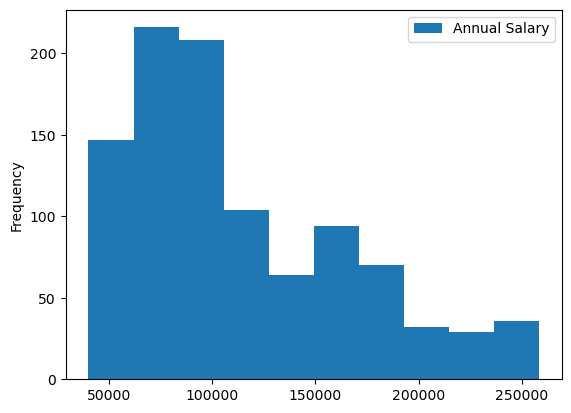

In [33]:
df.plot(y="Annual Salary", kind="hist")

### Guardando un DataFrame

La opción más común es guardar como .csv usando el método `to_csv()`

In [34]:
data = pd.DataFrame({"x": [1, 2], "y": [3, 4]})
data.to_csv("mis_nuevos_datos.csv")

## Matplotlib

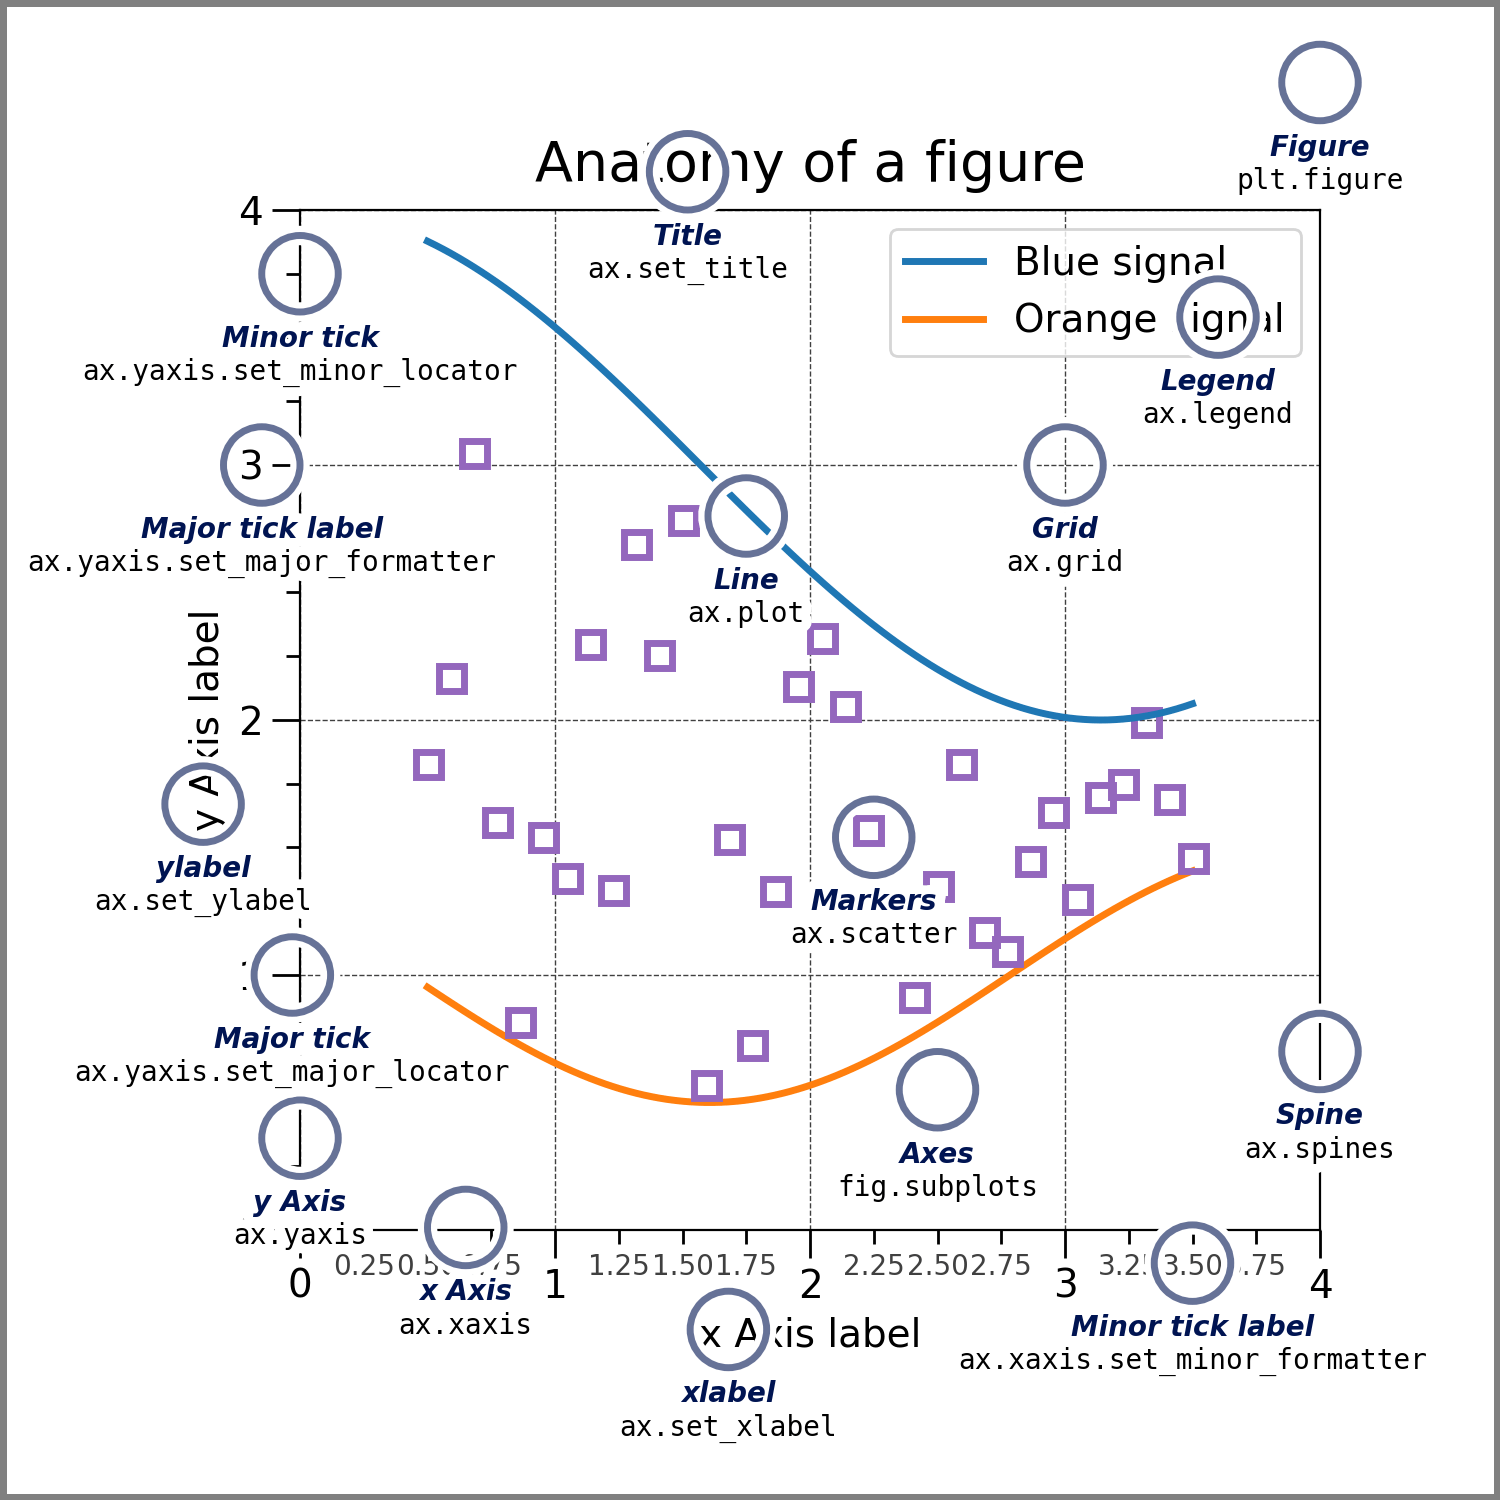

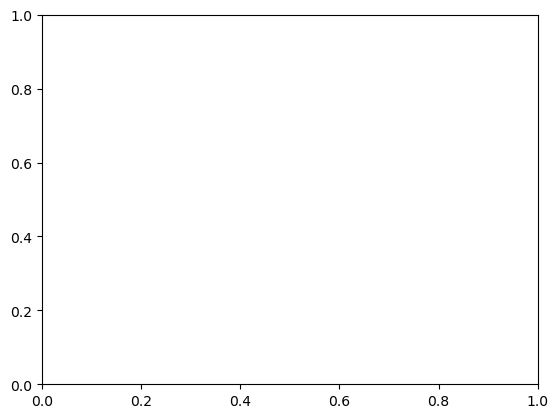

In [35]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots()

Vamos a generar datos aleatorios para graficar

/home/atuel/anaconda3/lib/python3.11/site-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


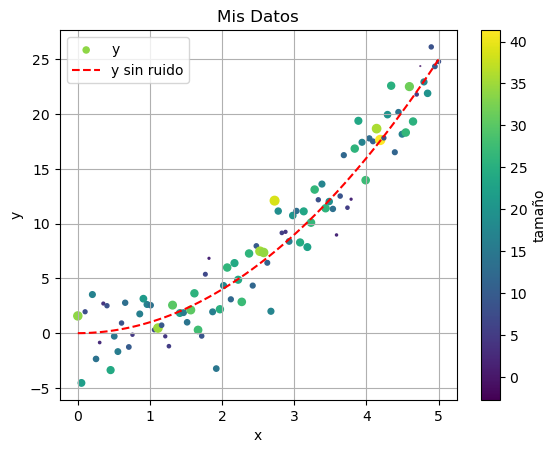

In [36]:
import numpy as np
from numpy import random

# generemos datos
N = 100
x = np.linspace(0, 5, N)
ruido = random.normal(0, 2, N)
y = x**2 + ruido
tamanio = 15 + random.normal(0, 10, N)

# grafiquemos
fig, ax = plt.subplots()

scatter = ax.scatter(x, y, s=tamanio, c=tamanio, label = "y")
ax.plot(x, y - ruido, label = "y sin ruido", color="red", linestyle="dashed")
ax.set(xlabel="x",
       ylabel="y",
       title="Mis Datos")
ax.legend()
ax.grid()
plt.colorbar(scatter, label="tamaño")

Veamos ahora dos plots en una figura

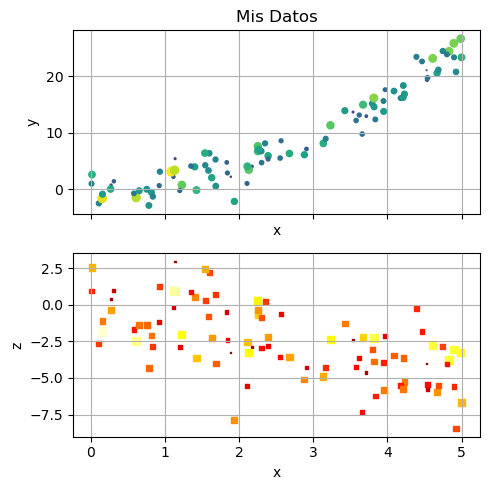

In [37]:
import numpy as np
from numpy import random

# generemos datos
N = 100
x = random.uniform(0, 5, N)
ruido = random.normal(0, 2, N)
y = x**2 + ruido
tamanio = 15 + random.normal(0, 10, N)
z = -x + ruido

# grafiquemos
fig, axs = plt.subplots(2, layout="tight", sharex=True, figsize=(5, 5))

# axs[0]
axs[0].scatter(x, y, s=tamanio, c=tamanio)
axs[0].set(xlabel="x",
       ylabel="y",
       title="Mis Datos")
axs[0].grid()


# axs[1]
axs[1].scatter(x, z, s=tamanio, c=tamanio, marker="s", cmap="hot")
axs[1].set_xlabel("x")
axs[1].set_ylabel("z")
axs[1].grid()


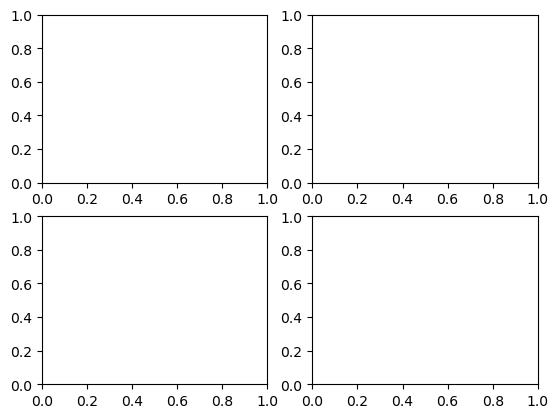

In [38]:
# grafiquemos
fig, axs = plt.subplots(2, 2)


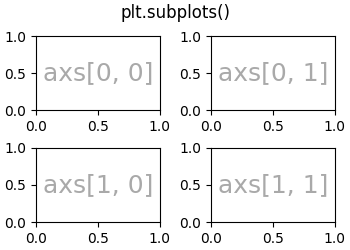

Usemos `subplot_mosaic()`

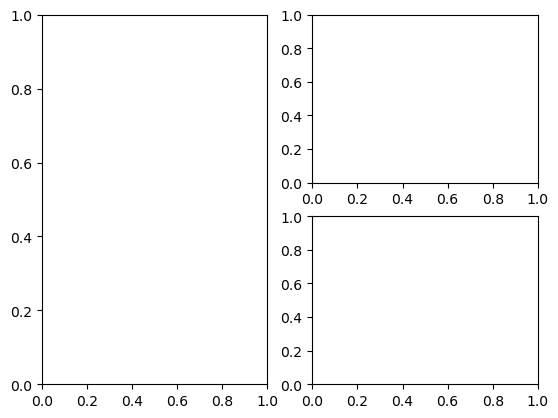

In [39]:
import matplotlib.pyplot as plt

fig, axs = plt.subplot_mosaic([["a", "b"], 
                               ["a", "c"]])

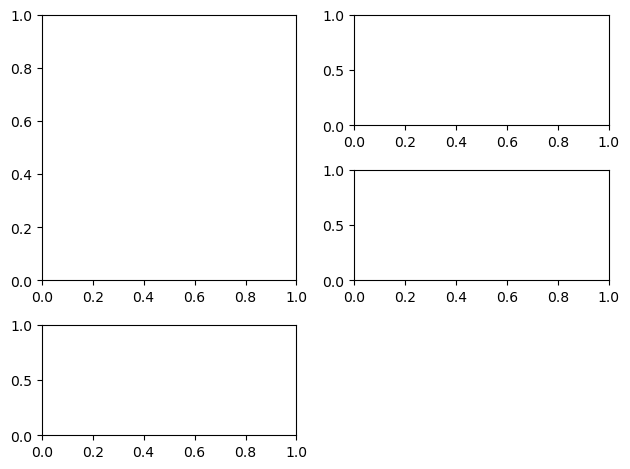

In [40]:
mosaico = [["a", "b"],
           ["a", "c"],
           ["d", "d"]]

mosaico = """
ab
ac
d.
"""
fig, axs = plt.subplot_mosaic(mosaico, layout="tight")

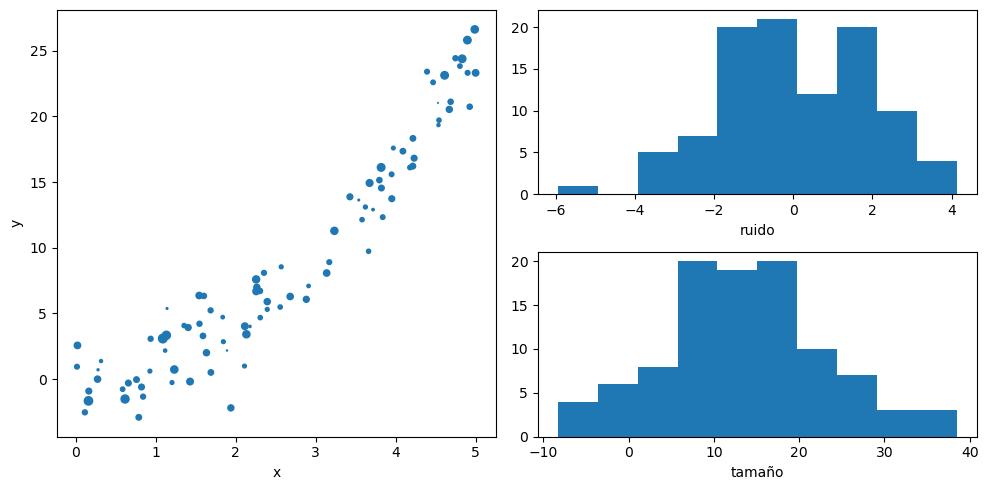

In [41]:
fig, axs = plt.subplot_mosaic([["y", "ruido"],
                               ["y", "tamanio"]],
                               figsize=(10, 5),
                               layout="tight")

# y
axs["y"].scatter(x, y, s=tamanio)
axs["y"].set(xlabel="x",
             ylabel="y")
# ruido
axs["ruido"].hist(ruido)
axs["ruido"].set_xlabel("ruido")

# tamaño
axs["tamanio"].hist(tamanio)
axs["tamanio"].set_xlabel("tamaño")

plt.show()

## Agunos Links Útiles para Profundizar

### Python Manejo de Archivos 

* Artículo en español: https://www.freecodecamp.org/espanol/news/python-como-escribir-en-un-archivo-abrir-leer-escribir-y-otras-funciones-de-archivos-explicadas/

### Pandas

* Recomendado ver este curso de Pandas bastante cortito: https://www.kaggle.com/learn/pandas
* Lista de tutoriales oficiales de Pandas: https://pandas.pydata.org/docs/getting_started/intro_tutorials/

### Matplotlib

* Ejemplos: https://matplotlib.org/stable/gallery/index.html
* Tutorial de Inicio: https://matplotlib.org/stable/users/explain/quick_start.html 
* Marcadores (para Scatter): https://matplotlib.org/stable/api/markers_api.html
* Estilos de Línea: https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html
* Colormaps: https://matplotlib.org/stable/users/explain/colors/colormaps.html

### Otras librerias para graficar:

#### Seaborn

Está construida sobre Matplotlib y simplifica muchos gráficos utilizados en análisis estadístico
https://seaborn.pydata.org/

#### Plotly

Se usa principalmente para gráficos pensados para la web. Sus plots son interactivos y es mucho más fácil hacer graficos en 3D
https://plotly.com/ 
